In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("marathi_sentiment_dataset (1).csv")
df

,text,sentiment
0,# ख्रिसमस | नाताळ सणाच्या शुभेच्छा | Christmas...,0
1,![शुभ सकाळ सुप्रभात ~ 500+ Good morning messag...,0
2,# शुभ सकाळ सुप्रभात ~ 500+ Good morning messag...,0
3,इच्छा दिली मानवाला। पण संतोष काढून घेतला।संतोष...,0
4,# पप्पू जोक्स मराठी | Funny Pappu Jokes In Mar...,0
...,...,...
686,# जीवनावर मराठी सुविचार Marathi Suvichar Quote...,0
687,ही आयुष्य भराची कमाई आहे। समाधानी राहण्यातच आय...,0
688,तुमच्या सोबतचे ते दोनच क्षणत्या व्यक्तीच्या एक...,0
689,# दर्जेदार विनोद | Marathi Vinod Marathistyle।...,0


In [3]:
df=pd.read_csv("tweets-train (1).csv")
df1=pd.read_csv("tweets-test.csv")
df2=pd.read_csv("tweets-valid.csv")
df3=pd.read_csv("tweets-extra.csv")

df = pd.concat([df, df1, df2, df3], ignore_index=True)

In [4]:
df["label"].value_counts()

label
 1    7643
-1    5447
 0    5288
Name: count, dtype: int64

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc

# Load your dataset

tweets = df['tweet']
labels = df['label']

# Preprocess text (basic cleaning)
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\.com\S*', '', text)  # Remove URLs
    text = re.sub(r'\n+', ' ', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

tweets = tweets.apply(clean_text)



# Predict on new data


In [ ]:
# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(tweets).toarray()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train model
model1 = LogisticRegression()
model2 = RandomForestClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Evaluate model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred1),classification_report(y_test, y_pred2))



RandomForestClassifier()

C:\Users\HPW\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

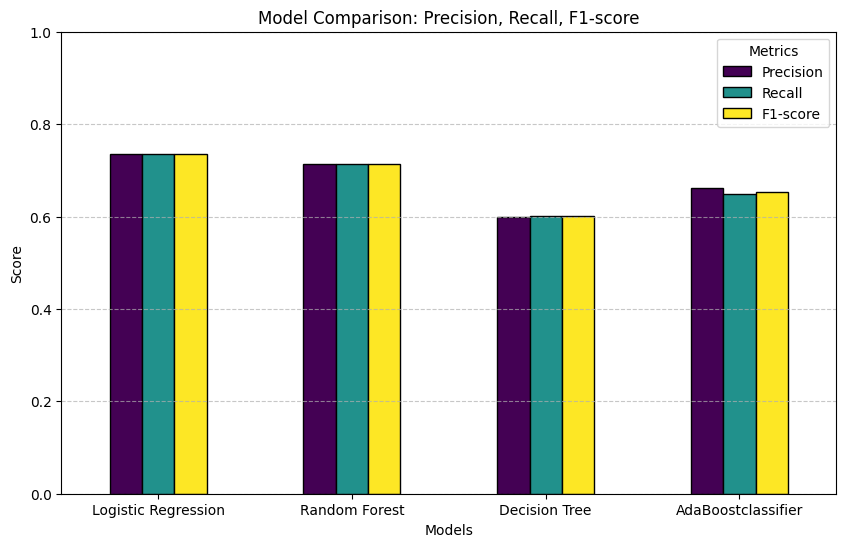

In [16]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Step 2: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoostclassifier": AdaBoostClassifier()
}

# Step 3: Train Models and Collect Metrics
metrics_dict = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Precision, Recall, and F1-score
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    metrics_dict[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T

# Step 4: Plot the Metrics as a Bar Chart
plt.figure(figsize=(10, 6))
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")

# Customization
plt.title("Model Comparison: Precision, Recall, F1-score")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()



In [9]:
new_tweet = ["काल महापूर आल्यामुळे लोकांचे खूप नुकसान झाले."]
new_tweet_cleaned = [clean_text(tweet) for tweet in new_tweet]
new_tweet_vectorized = tfidf.transform(new_tweet_cleaned).toarray()
predicted_label = model2.predict(new_tweet_vectorized)
print(new_tweet_cleaned)
model2.predict_proba(new_tweet_vectorized)
# print("Predicted Sentiment:", predicted_label)


['काल महापूर आल्यामुळे लोकांचे खूप नुकसान झाले.']


array([[0.2425  , 0.206875, 0.550625]])

In [24]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load your dataset
# Assuming your dataset is loaded in a DataFrame named `df`
# Replace with your actual data loading code
# Example: df = pd.read_csv("your_dataset.csv")
tweets = df['tweet']
labels = df['label']

# Preprocess text (basic cleaning)
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\.com\S*', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\n+', ' ', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

tweets = tweets.apply(clean_text)

# Split data
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', LogisticRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Serialize the pipeline
with open('tweet_sentiment_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline saved as 'tweet_sentiment_pipeline.pkl'")


Accuracy: 0.7848204570184983
              precision    recall  f1-score   support

          -1       0.80      0.82      0.81      1129
           0       0.72      0.69      0.70      1040
           1       0.82      0.82      0.82      1507

    accuracy                           0.78      3676
   macro avg       0.78      0.78      0.78      3676
weighted avg       0.78      0.78      0.78      3676

Pipeline saved as 'tweet_sentiment_pipeline.pkl'


In [25]:
test_data = pd.read_csv('tweets-test.csv')

In [26]:
texts = test_data['tweet']  # Extract text
true_labels = test_data['label']  # Extract true labels

texts_cleaned = [clean_text(tweet) for tweet in test_data['tweet']]
X_test = tfidf .transform(texts_cleaned).toarray()
predicted_labels = model.predict(X_test)

In [27]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

Accuracy: 0.5235555555555556
Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.43      0.52       750
     Neutral       0.49      0.61      0.54       750
    Positive       0.48      0.53      0.50       750

    accuracy                           0.52      2250
   macro avg       0.55      0.52      0.52      2250
weighted avg       0.55      0.52      0.52      2250

